
**New York City AirBnb <br><a href='https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data'>source**</a>
<br>Muchigi Kimari, Jordan Salsman, Angelo Bravo, Thomas Karba


# *Resubmission Changes*:
## Data Quality
**changes**: We chose to add a visualization for the missing data. The visualization makes the pattern/cause of missing data much easier to deduce as well as much clearer and more intuitive. 

## Simple Statistics
**changes**: Added boxplot visualizations for certain, imperative numerical cof the columns of our dataset. The boxplots are a great visualziation for sample statistics because they show the distribution of the random variables, make outliers easily visible. The ranges are easy to compare with respect to one another. 

## Visualize Attributes:
**changes**: The issue was we did not use the format in the rubric to explain each visual. Therefore, we added a new markdown and named it 'new explaination', and extensively  talked about for each visual:
  - what interesting thing was capture to each visual
  - What are the implications
  - and why we chose the visualizations

## Explore Attribute and Class
**changes**: For this section, we did not explain properly the relationships between the features with price. Therefore, again we added a new text section and named it 'new explaination', and extensively explained how the features relates to price

## Joint Attributes
**changes**: There was a joint scatterplot between minimum nights and price that was not graded because it did not load. **Added material**: A second cross tabulation with availability and minimum nights to gauge the relationship between these features. A closer examination of the group-wise averages of price with neighborhoods is also added.

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')
data.head(1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


# Business Understanding


This dataset is of various places in New York City listed on Airbnb. Airbnb is a website that connects owners who are willing to rent out their properties with people looking for a place to stay. Each individual place is a unique observation within the dataset and has various attributes associated with that place. This data was collected to give an insight into the Airbnb rental market within New York City. Specifically, we are looking into the price variable of each place. Practically, we are looking to see which variables have effects on price and which do not. This information helps current Airbnb owners optimize their pricing and it helps any person looking to buy property and rent it out understand which factors will provide the highest prices for them. By creating different plots such as boxplots, bar graphs, and correlation matrix we can we can visualize the effects of different variables, such as neighborhood, on price.  Since our goal is to better understand the market place all of these visualizations give us valuable information. Knowing whether a variable has a strong relationship with price or not tells us how important that feature is to determine the price.

After exploring the dataset and finding key inference and relationships a predictive model will be made. An accurate predictive model would help prospective landlords be able to gauge how much they can expect to list their property for given its attributes. A good predictive model would allow us to confidently predict within a tight range of prices. In order to measure the effectiveness of our predictive model we will split the data into a training and a test set. We will then build our model using the training data and predict the prices using the test set. From here we will use a metric that measures the deviation between our predicted price values and the actual price values in the test set. Root-mean-square error, RMSE, is a good metric for quantifying this difference. A lower RMSE is preferable since it would mean more accurate predictions.



# Data Meaning

**id** – a unique property integer associated with each separate property listed. This is unique for each observation within the dataset.

**name**- a set of strings representing the name given by the owner’(s) to each property.

**host_id**- a unique integer associated with each host. This is not unique to each observation because a host can have more than one property.

**host_name**- a string representing the name of the host.

**neighbourhood_group**- a string representing which borough the property is in.

**neighbourhood**- a string representing which district the property is in. 

Districts are unique to certain boroughs (neighbourhood_group).

**latitude**- a float number that is the latitude coordinate for the property.

**longitude**- a float number that is the longitude coordinate for the property.

**room_type**- a string object with three different levels.

**price**- a positive integer representing the cost of each property in U.S. dollars.

**minimum_nights**- a positive integer representing the least amount of nights that are required to stay to book the property.

**number_of_reviews**- an integer that totals the amount of reviews left for a specific listing on Airbnb.

**last_review**- The date expressed as numbers written year, month, day. NaN is used if there are zero reviews of a listing.

**reviews_per_month**- a float that averages the amount of reviews a listing has received by the number of months it has been listed on Airbnb. Nan If there are zero reviews.

**calculated_host_listings_count**- an integer for each separate listing for each host.

**availability_365**- an integer, from 0 to 365, that represents the amount of days each listing is available for that year. 






In [ ]:
#cleaning data
data = data[data.price>0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48868 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48863 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  last_review                     

# Data Quality

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'https://raw.githubusercontent.com/thomaskarba/MachineLearningSMU/master/AB_NYC_2019.csv')



In [ ]:
#print columns with missing values
df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
df[df['number_of_reviews'] != 0].isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


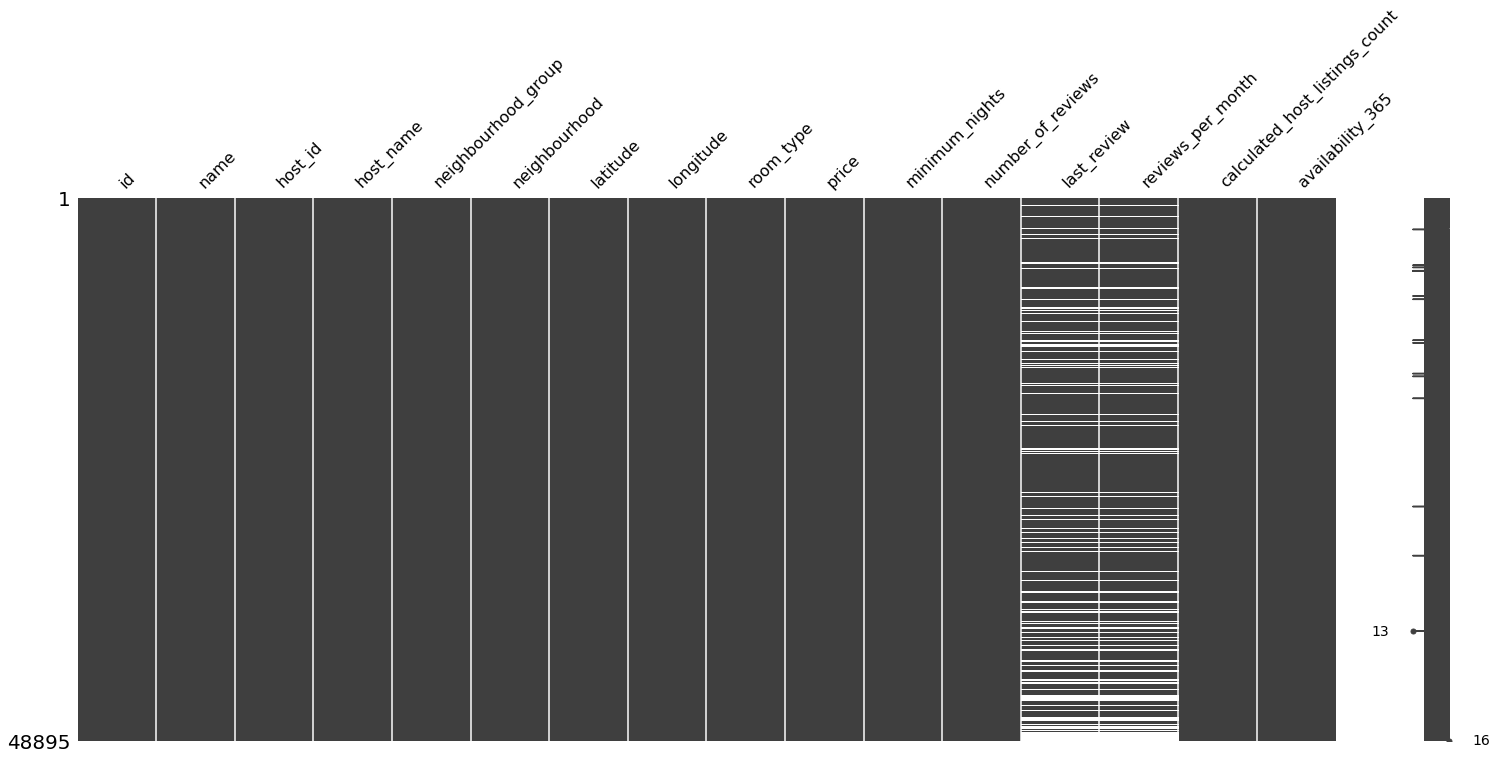

In [ ]:
import missingno as msno

msno.matrix(df)

only NAs not in name and hostname columns are where number of reviews equal 0. The reviews_per_month and last_review columns and really relevant in building a model as we don't have input as to whether a review is good or bad. The reviews_per_month and last_review columns can be eliminated. 


In [ ]:
print('Are there any duplicate rows overall? ', df.duplicated().any())

for col in list(df.columns.values.tolist()):
  print('Duplicate values in ', col, ': ', df[col].duplicated().any())


  

Are there any duplicate rows overall?  False
Duplicate values in  name :  True
Duplicate values in  host_name :  True
Duplicate values in  neighbourhood_group :  True
Duplicate values in  neighbourhood :  True
Duplicate values in  room_type :  True
Duplicate values in  price :  True
Duplicate values in  minimum_nights :  True
Duplicate values in  number_of_reviews :  True
Duplicate values in  last_review :  True
Duplicate values in  reviews_per_month :  True
Duplicate values in  calculated_host_listings_count :  True
Duplicate values in  availability_365 :  True


There are no duplicate complete rows in our dataset. Each individual column does have duplicate values, but that is acceptable because it is expected for this type of data to have duplicate values. 

**New explaination**

We chose to visualize our missing data in a manner which helps us decipher a pattern in our missing data. From our visualization, we see that when 'last_review' is missing a value, so is 'reviews_per_month' and vice versa. 

**The interesting** thing we found was that when 'number_of_reviews' has a value of zero, both 'last_review' and 'reviews_per_month' are missing. 

**The reason why** is because you cannot have a last review, or numbers of reviews per month when you have had zero reviews overall. This was a great visualization to help deduce this pattern in our dataset.

# Simple Statistics

In [ ]:
#providing meaningful statistics for each attribute
data.describe()
#add boxplot for each column

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


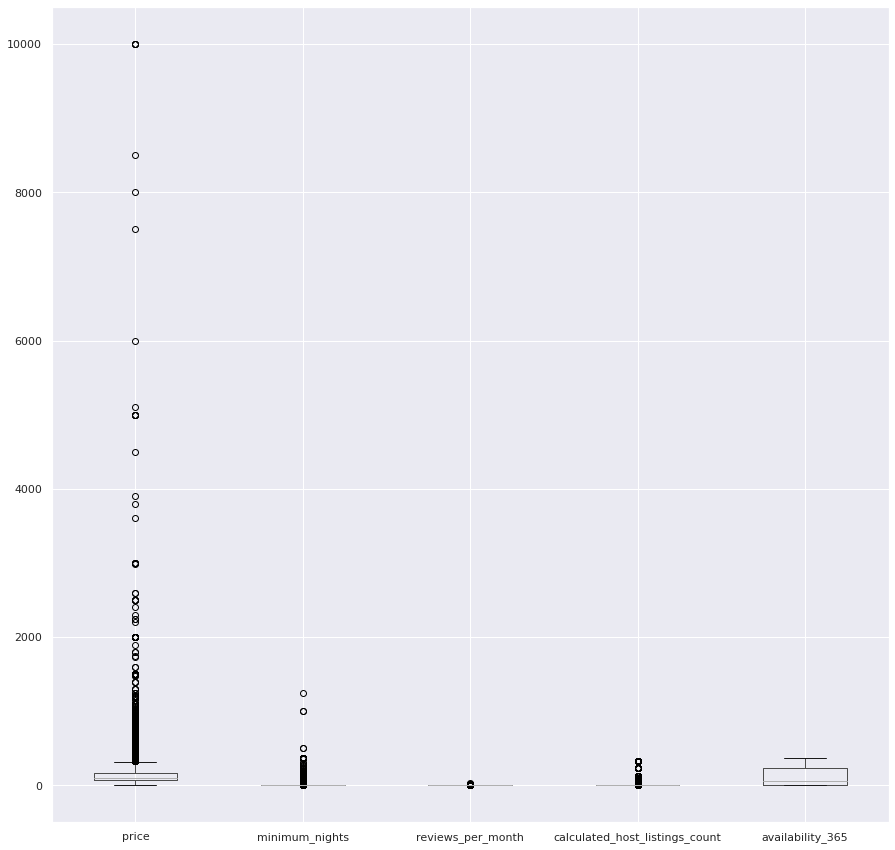

In [ ]:
import matplotlib.pyplot as plt

    
df.boxplot(column = ['price','minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], figsize = (15,15))

The summary statistics for our features show some very intriguing findings. The maximum minimum nights required for booking a stay from the Airbnbs in our dataset is 1250 nights. According to our dataset, on average, an Airbnb is only available for 112 days a year. Each host on average has 7 listings available. Price is right-skewed distribution with the average greater than the median and vast outliers at  10k. May require a transformation. On average a listing is available 2/3 of the year. 

**New explaination**

The ranges vary for continuous variables vary drastically in our dataset. 'Price' has the largest range, with a large amount of outliers. Which is understable.

**The interesting** thing is, from our boxplots, we can get an idea of which variables may require transformation for model fitting. 'Price' is a right- skewed continious random variable, which may require a log transformation in order to more closely resembles a normal distribution, as well as 'minimum_nights' and 'calculated_host_listings_count'.

**The reason why** we chose the box plot was because we wanted a way to visualize the distributions and ranges of our continuous random variables relative to one another. 

# Visualize Attributes


In [ ]:
#Allows plots to be embedded into the notebook
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
cmap = sns.diverging_palette(220,10, as_cmap=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


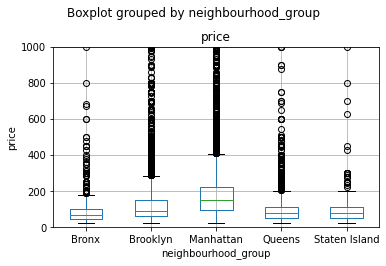

In [ ]:
viz_data = data[['host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']]
viz_data=viz_data[viz_data.price>20]
viz_data.boxplot(column='price',by='neighbourhood_group',grid=True)
plt.ylim(0,1000)
plt.ylabel('price')
plt.tight_layout(pad=3)
              

The above box plot shows the price distribution for each Neighbourhood group. Manhattan and Brooklyn on average have higher prices and the Bronx and Queens have low prices.
The outliers continue up to 10,000. The y limit had to be adjusted to get a better idea of the boxplot structure.

We chose the box plot because we though it was a powerfull way to illustrate price distribution

#New explaination

For first attribute we chose to capture price distribution for each neighbourhood group.

**The interesting** thing we found was that we had outliers of 10000 dollars. That means someone paid 10000 to rent a house or a private room.

**The Implication** is that on average renting space in Manhattan is very expensive, but the renting space in the Bronx, Queens and staten Island is very cheap

**The reason why** we chose the box plot was because we wanted to compare the price distribution of the neighbourhood groups in one plot. We could have use a histogram but that meant would have to create 5 separate plots

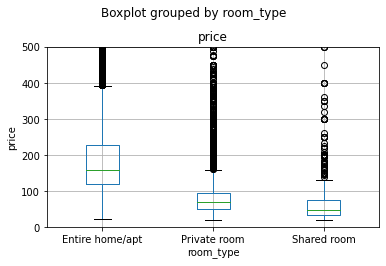

In [ ]:
viz_data.boxplot(column='price',by='room_type',grid=True,)
plt.ylim(0,500)
plt.ylabel('price')
plt.tight_layout(pad=3)


In the above graph as expected from the distribution, a person will expect to pay more for an entire home than private room or shared room. But it is interesting to see prices for Private room as high as 10000.


#New Explanation

THe above box plot captures price distribution for room type.

**The interesting** thing about this plot is that, people pay a lot of money for a Private rooms, almost the price of an Entire home. It would be interesting to visualize which Neighbourhood Group have pricy private rooms.

**The implications** is that on average the prices are higher for an Entire room

**The Reason** why we chose Box plot is because its easier to compare price distributions for different elements on the same plot 


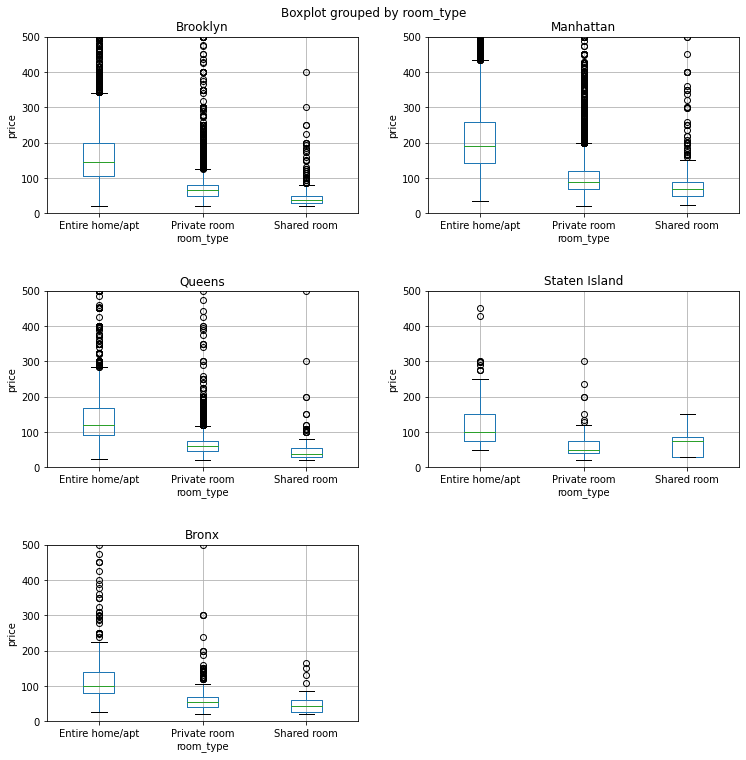

In [ ]:
roomtype= viz_data[['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count']]

fig, axes = plt.subplots(3,2,figsize=(11,11),squeeze=False)
axes[-1, -1].axis('off')
for i,el in enumerate(list(viz_data['neighbourhood_group'].unique())):
  B = viz_data[viz_data['neighbourhood_group']==el]
  a= B.boxplot(column='price', by="room_type", ax=axes.flatten()[i])
  a.set_ylim(0,500)
  a.set_ylabel('price')
  a.title.set_text(el)
  
plt.tight_layout(pad=3.0)


#fig.delaxes(axes[1,1]) # remove empty subplot

#plt.tight_layout() 
#plt.show()

We also broke down room type for each NeighborHood Group, and visualized price distrubution  by room type. And average Entire Home/apt have higher price distributions.

Again we chose to use Box plots because we can visualize price distributions for each room type



#New Explanation

Since on the previous plots we identified private rooms with pricy prices, we decided to capture for every neighbourhood Group, the price distribution for every room type

**we notice that the interesting**  higher prices came from manhattan. It is the only Neighborhood group that has average price over 100 for the private room.

**The implication** is that on average renting property is expensive for every room type, and Bronx is fairly cheap to lease a place.

**Again we chose the Box plot** because with out generating several plots for distribution of price on room type for every neigborhood Group, we could visuaize it all on one plot for each neighborhood Group



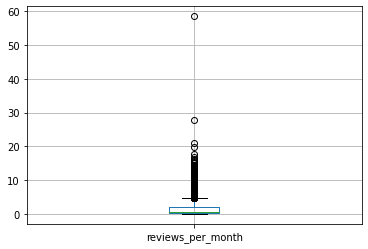

In [ ]:
data.boxplot(column='reviews_per_month')
data = data[data.reviews_per_month<30]

One property is posting Fake reviews of itself #fakenews. The reviews per month is greater than 30 which is the maximum amount of reviews a property/host can receive.

#New Explanation

the above box plot is for reviews distribution

**One interesting** thing is that we have an outlier of 60 reviews for one property. This can be someone generating their own reviews (#fakenews)to attract Customers.

**The implication** is that on average people normally get less than 10 reviews for their property.

We chose box plots again because they capture distributions fairly well





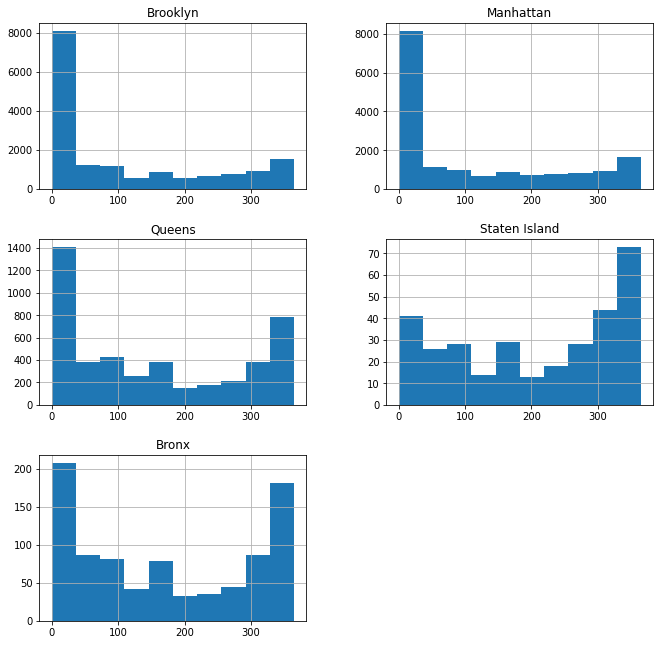

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(11,11))
axes[-1, -1].axis('off')
for i,el in enumerate(list(data['neighbourhood_group'].unique())):
  B = data[data['neighbourhood_group']==el]
  a=B.hist('availability_365',ax=axes.flatten()[i])
  
  if i ==0:
    axes[0,0].set_title(el)
    plt.xlabel('count')
  if i ==1:
    axes[0,1].set_title(el)
  if i ==2:
    axes[1,0].set_title(el)  
  if i ==3:
    axes[1,1].set_title(el)
  if i ==4:
    axes[2,0].set_title(el)


  #a.set_title(el)
  #fig. tight_layout(pad=3.0)


The above Graphs capture 365 days availablity for each neighbourhood_group.


1.   Brooklyn and Manhattan have over 10000 properties with an average availablity of about 50 days
2.   In Queens, Staten Island, and the Bronx  availabilties are with in 1-50 days and 300-365 days. But in general don't have a lot of properties compared to Brooklyn and Manhattan




# New Explanation

The above Graphs capture 365 days, availabilty for each neighbourhood group

**The interesting** thing here is that, now we know why Staten Island is cheaper to rent a place, because they have less demand compared to Manhattan.

**The implication is** that Brooklyn And Manhattan are places where many people come to visit.

We chose to visualize using a histogram because ther are good at visualizing the magnitude 365 days availability for each neighbourhood group



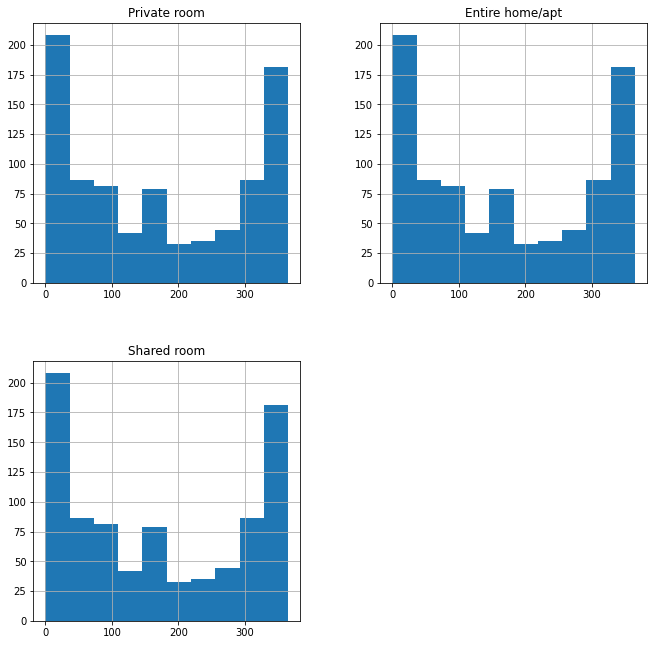

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(11,11))

for i,el in enumerate(list(data['room_type'].unique())):
  axes[-1, -1].axis('off')
  a=B.hist('availability_365',ax=axes.flatten()[i],)
  if i ==0:
    axes[0,0].set_title(el)
  if i ==1:
    axes[0,1].set_title(el)
  if i ==2:
    axes[1,0].set_title(el)  
  
  #fig. tight_layout(pad=3.0)
  

The Box plots above capture availabilty by roon type. What's interesting here is that Private rooms are very popular in newyork, and the average availabilty is around 1 to 50 days. Shared rooms are not as popular

#New Explanation

The Box plots above capture availabilty by roon type. 

**The interesting** thing here is that Private rooms are very popular in Newyork than the Entire houses

**the implication** is that on average availabilty is around 1 to 50 days. Shared rooms are not as popular

We chose histgrams because they capture the spread and shape for '365 days availabilty' continuous attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f170ada47b8>,
      dtype=object)

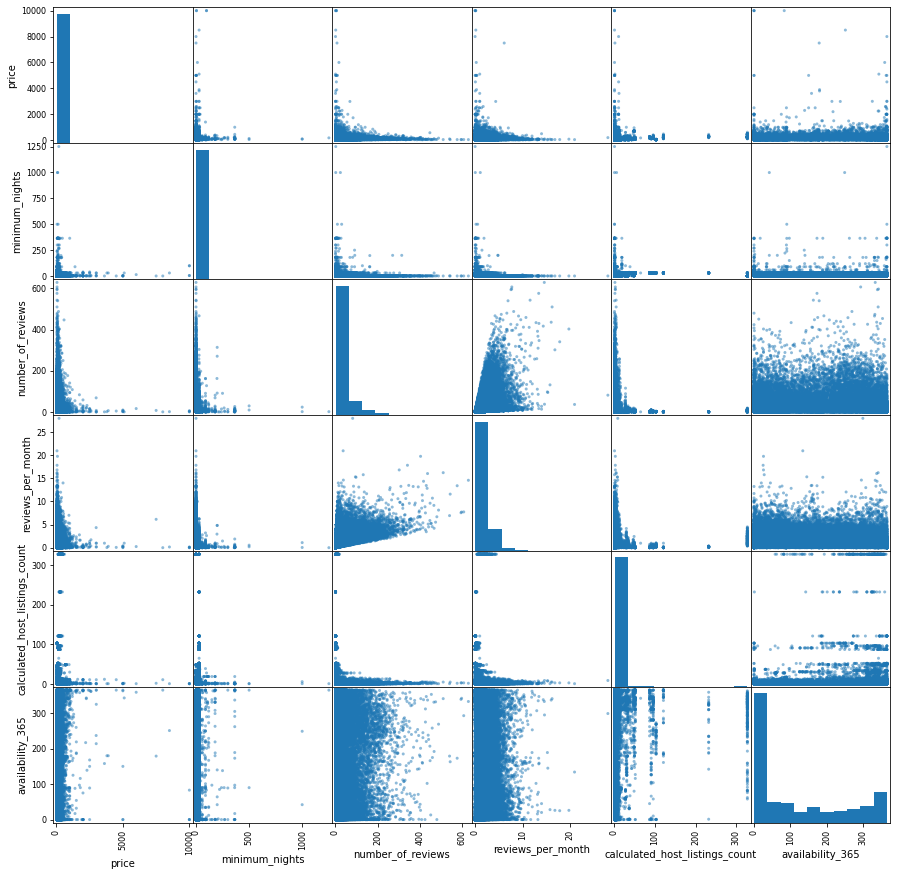

In [ ]:
from pandas.plotting import scatter_matrix
df = data.drop(['id','host_id','longitude','latitude'],axis=1)
scatter_matrix(df,figsize=(15,15))

This is a scatter matrix of all features excluding some of the less useful ones like host_id. One of the more interesting scatterplots are price by availability_365. It shows that price does not always determine availability or number of guests will rent a property. It really depends on location and other qualities of the property. 

# Joint Attributes

## new material

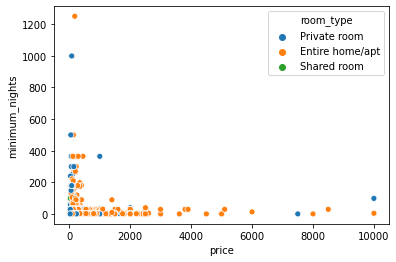

In [ ]:
sns.scatterplot(x='price', y="minimum_nights",
              hue="room_type",
              data=data)

This scatter plot explores the relationship (if any) for the prices of Airbnb rentals and the minimum number of nights the rental is available. Shared rooms are in small quantity and the bulk of rentals are either private rooms or the entire property. As the minimum number of nights increase the price decreases. This however doesn't tell the whole story, how much income a Airbnb and a host receive from a single guest. Further exploration of this is necessary.

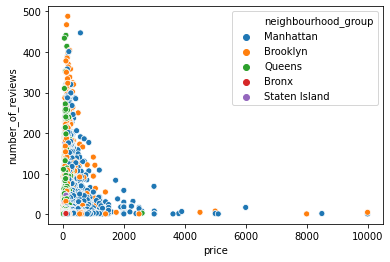

In [ ]:
sns.scatterplot(x='price', y="number_of_reviews",
              hue="neighbourhood_group",
              data=data[data['room_type']=='Entire home/apt'])

Here is another scatterplot showing where Airbnb hosts have the most success, gauged by number of reviews by price. As price increases there are less reviews with a sweet spot being around $800.

rental_term          daily  weekly  monthly
neighbourhood_group                        
Bronx                  817      34       24
Brooklyn             14088    1487      863
Manhattan            13533    1472     1626
Queens                4080     281      213
Staten Island          296       6       12

rental_term             daily    weekly   monthly
neighbourhood_group                              
Bronx                0.933714  0.038857  0.027429
Brooklyn             0.857039  0.090461  0.052500
Manhattan            0.813721  0.088509  0.097769
Queens               0.891998  0.061434  0.046568
Staten Island        0.942675  0.019108  0.038217



Text(0.5, 1.0, 'Extended Stays - Counts')

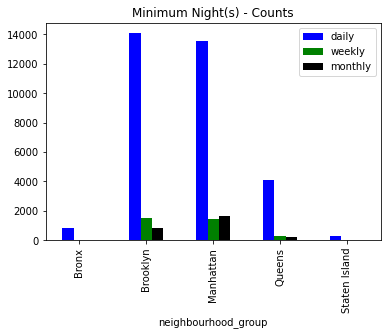

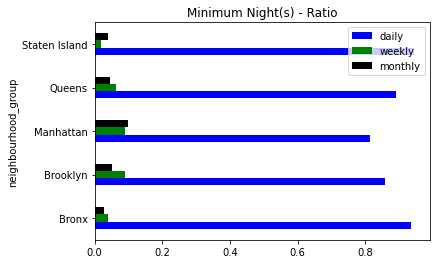

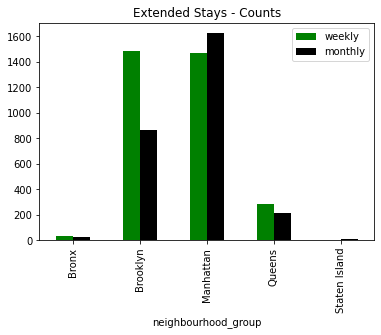

In [ ]:
import pandas as pd

data['rental_term']=pd.cut(data.minimum_nights,[0,6,29,1400],2,labels=['daily','weekly','monthly'])
#df_grouped = data.groupby('neighborhood_group','rental_term')
rental_type = pd.crosstab(data.neighbourhood_group,data.rental_term)
print(rental_type)

rental_rate = rental_type.div(rental_type.sum(1).astype(float),axis=0)
print()
print(rental_rate)
print()

rental_type.plot(kind='bar',color=['blue','green','black']).legend()
plt.title('Minimum Night(s) - Counts')

rental_rate.plot(kind='barh',color=['blue','green','black']).legend()
plt.title('Minimum Night(s) - Ratio')


data['long_term']=pd.cut(data.minimum_nights,[6,29,1400],2,labels=['weekly','monthly'])
extended_stay = pd.crosstab(data.neighbourhood_group,data.long_term)
extended_stay.plot(kind='bar',color=['green','black']).legend()
plt.title('Extended Stays - Counts')

Text(0.5, 1.0, 'Minimum Night(s) - Counts')

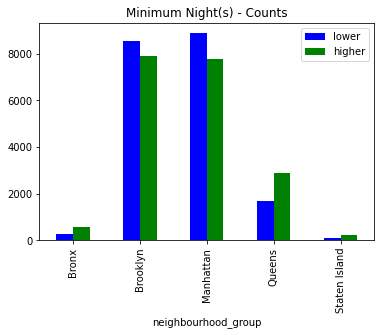

In [ ]:
data['reviews']=pd.cut(data.reviews_per_month,[0,.72,60],labels=['lower','higher'])
ct = pd.crosstab(data.neighbourhood_group,data.reviews)
ct.plot(kind='bar',color=['blue','green']).legend()
plt.title('Minimum Night(s) - Counts')



This cross tabulation gives an idea what the hosts have in mind for the length of stay for their guests. The minimum nights are plotted across the burrows. The ratio plot shows similar makeup for min nights cut (daily,weekly,monthly) gradually increasing the closer to the center of NYC. The Counts plot reveal very few rentals further away in Staten Island and the Bronx, especially for weekly and monthly, alluding to the fact these areas may be more residential with families or far enough from "the action" that these guests may not be interested in the events/attractions NYC has to offer and will be simply looking for a place to stay in New York or have other reasons for visiting.
## NYC Burrows map
![alt text](https://dominicyang.weebly.com/uploads/3/7/5/2/37521579/7297879_orig.jpeg)


## new material

rental_term   daily  weekly  monthly
availability                        
low_avail      9174     868      387
medium_avail   5791     522      702
high_avail     6721     634     1347

rental_term      daily    weekly   monthly
availability                              
low_avail     0.879662  0.083229  0.037108
medium_avail  0.825517  0.074412  0.100071
high_avail    0.772351  0.072857  0.154792



Text(0.5, 1.0, 'Extended Stays - Counts')

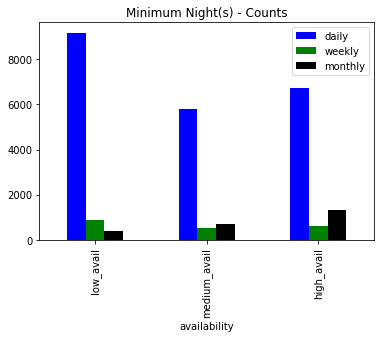

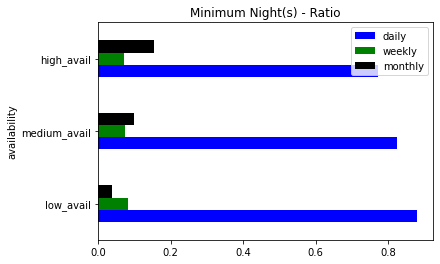

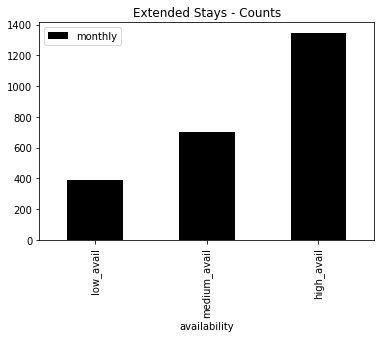

In [ ]:
#Allows plots to be embedded into the notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
cmap = sns.diverging_palette(220,10, as_cmap=True)

data['rental_term']=pd.cut(data.minimum_nights,[0,6,29,1400],2,labels=['daily','weekly','monthly'])
data['availability']=pd.cut(data.availability_365,[0,100,250,366],2,labels=['low_avail','medium_avail','high_avail'])
rt_av = pd.crosstab(data.availability,data.rental_term)
print(rt_av)

rt_av_rate = rt_av.div(rt_av.sum(1).astype(float),axis=0)
print()
print(rt_av_rate)
print()

rt_av.plot(kind='bar',color=['blue','green','black']).legend()
plt.title('Minimum Night(s) - Counts')

rt_av_rate.plot(kind='barh',color=['blue','green','black']).legend()
plt.title('Minimum Night(s) - Ratio')


data['long_term']=pd.cut(data.minimum_nights,[29,1400],2,labels=['monthly'])
extended_stay = pd.crosstab(data.availability,data.long_term)
extended_stay.plot(kind='bar',color=['black']).legend()
plt.title('Extended Stays - Counts')

Doing a double cross tabulation to gather both the minimum stays and availability into bins, I wanted to see if there is any discernable relationship between minimum nights and availability. Judging by all the plots it seems that where the trend is with the monthly (longer term) minimum stays, that those properties tend to have increasing bars and tend to have higher availability. Conversely, the daily minimum nights (less than a week) tend to have decreasing availability if you consider the ratio plot only. What this tells us is that properties may have a much higher chance of success managing a property with lower stipulation of minimum number of nights for the guest.

## new material

91% of listings are under $200


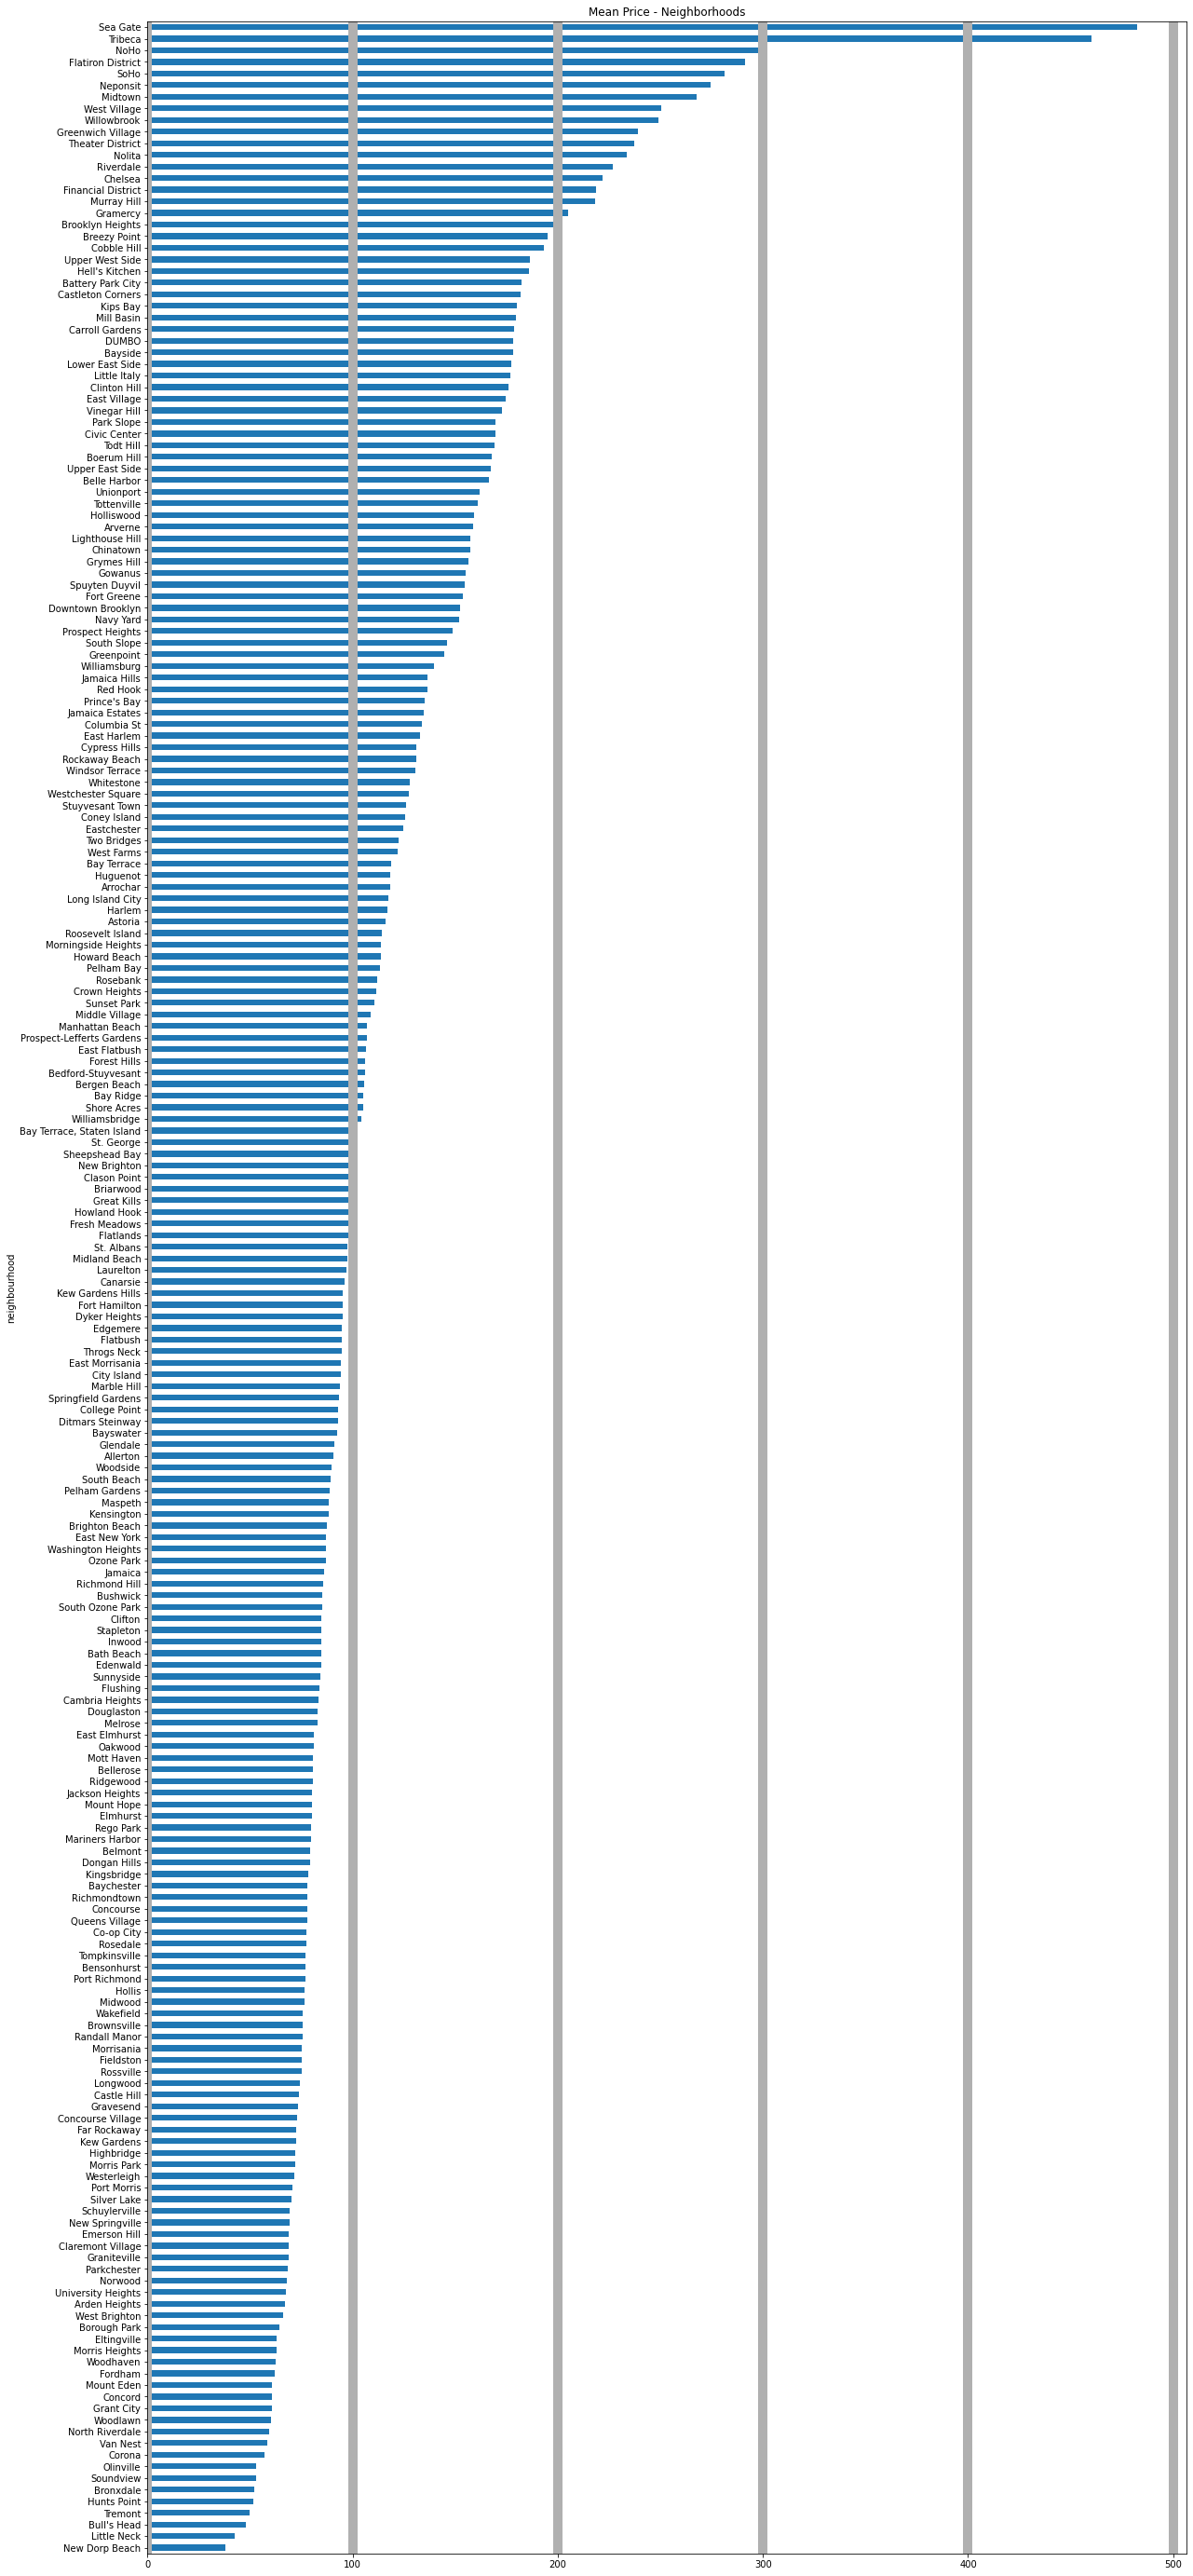

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

grp = data.groupby('neighbourhood').price.mean().sort_values()
x_labels=grp[:]

plt.figure(figsize=(20,50))
ax = grp.plot(kind='barh')
plt.grid(b=True,axis='x',linewidth=10)
plt.title('Mean Price - Neighborhoods')

print(int(x_labels[x_labels<200].count()/x_labels.count()*100),'% of listings are under $200',sep='')



These are group-wise means of price for the groups being the neighbourhoods in the burrows. Price is increasing exponentially. Each vertical represents \$100 more in price. 91% of neighborhoods, you can expect to get an Airbnb for under $200.

# Explore Attribute and Class

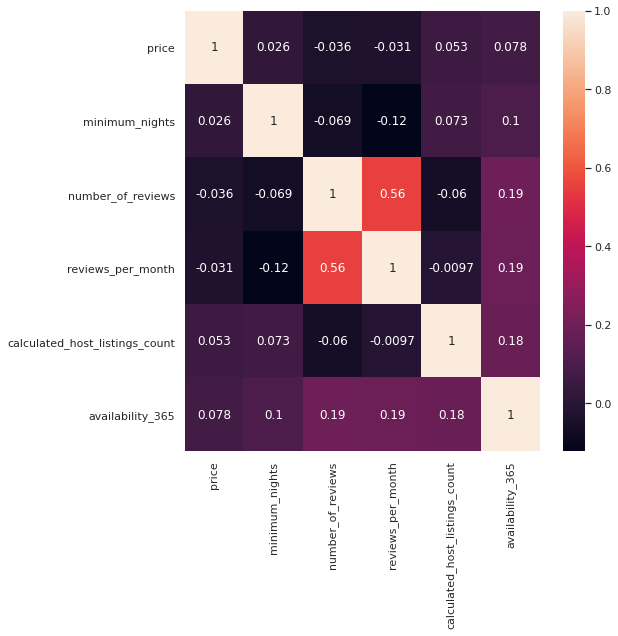

In [ ]:
corr = data[[ 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]


cmap=sns.diverging_palette(220,10,as_cmap=True)

sns.set(style="darkgrid")

f,ax = plt.subplots(figsize=(9,9))

sns.heatmap(corr.corr(),annot = True)
f.tight_layout()

We tried to look at the correlations between price and the other continuous 
Attributes and we captured really low correlations. Therefore, the correlation matrix did not give us good insight into the relationships.

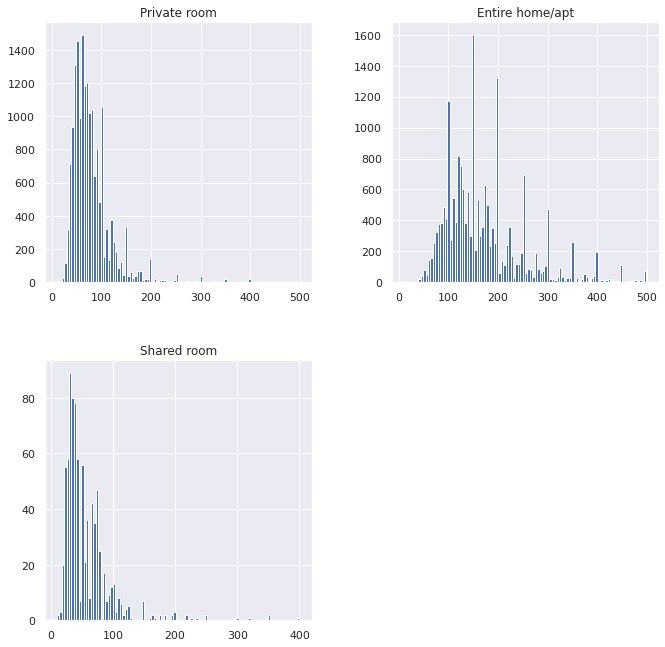

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(11,11))
axes[-1, -1].axis('off')
for i,el in enumerate(list(data['room_type'].unique())):
  A = data[data['price']< 500]
  B = A[A['room_type']==el]
  a=B.hist('price',ax=axes.flatten()[i],bins=100)
  if i ==0:
    axes[0,0].set_title(el)
  if i ==1:
    axes[0,1].set_title(el)
  if i ==2:
    axes[1,0].set_title(el)  
  
  2441
  #a.set_title(el)
  #fig. tight_layout(pad=3.0)
  

Since we found low correlations between price and the continous attributes, we decided to look for relationships with categorized variable. For example the histograms illustrate the relationships between price and room type. And from the distributions we can see that homes have higher price distribution than the other room types.


#New Explanation

The above histograms capture the different relationships the room types have on price.

So lets look at each roomtype extensively;


1.   **For the private_rooms** we can see that we have a lot of outliers, however the histogram is skewed to the left side. This means that the prices for private room are on the low end with an average of fifty dollars a night.
2.   **For Entire Home**, we still have some outliers, but even thought the histogram is skewed, it is shifted more  slightly to the right than the histram for private rooms. This generaly means that the prices are higher for entire homes than private room with and average of a hundred and twenty dollars a night.
3.   **For shared rooms**, the histogram again is skewed to the left like for private rooms, but we can see the average, which is about 20, is lower compared to the other room types. 

So we can conclude that the relationship between the room types and prices is that price is dependent on how big is the space, and the demand for that space. As one can see  from the histograms, the Entire homes have more space and more demand hence higher prices



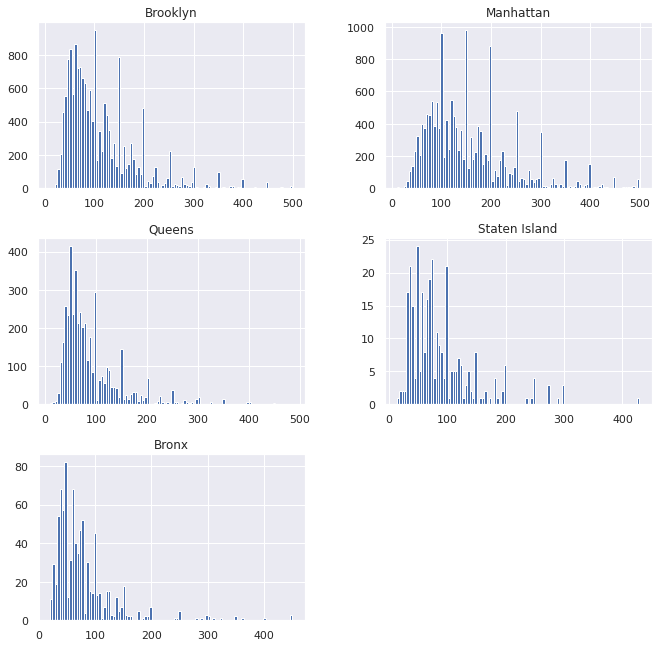

In [ ]:
fig, axes = plt.subplots(3,2,figsize=(11,11))
axes[-1, -1].axis('off')
for i,el in enumerate(list(data['neighbourhood_group'].unique())):
  A = data[data['price']< 500]
  B = A[A['neighbourhood_group']==el]
  a=B.hist('price',ax=axes.flatten()[i],bins=100)
  if i ==0:
    axes[0,0].set_title(el)
  if i ==1:
    axes[0,1].set_title(el)
  if i ==2:
    axes[1,0].set_title(el)  
  if i ==3:
    axes[1,1].set_title(el)
  if i ==4:
    axes[2,0].set_title(el)
  
  2441
  #a.set_title(el)
  #fig. tight_layout(pad=3.0)

Above is another example we found, where From the histograms we can see that getting a place in Manhattan is generally very expensive and Staten Island is fairly cheap

#New Explanations

The histograms above captures the relationships between price and the Neighbourhood groups.

From the histgrams we can catergorized the groups into two:


1.   Although Brooklyn has more people that lease property compared to the Bronx , Queens, and Staten Island. The four locations kinda have similar histograms. They are skewed to the left, and they kinda have an average price per night of about 50 dollars.
2.   Finally, Manhattan is the only location with a histogram that captures prices averaging around 100 dollars a night.

The relationship between neighbourhood group and prices tell us that the higher the prices on leasing a property depends on locations. This is because, Brooklyn have the same volume of people leasing property as Manhattan, but Manhattan prices are on the higher side. Which tells us that Manhattan is a very upscale and popular area.




# New Features

## Base_Income feature

The mean base income for hosts is $922
The median base income for hosts is $288.0
The max $ for base income for hosts is $1000000
The maximum reasonable base income is $300000


Text(0, 0.5, 'Counts<10,000')

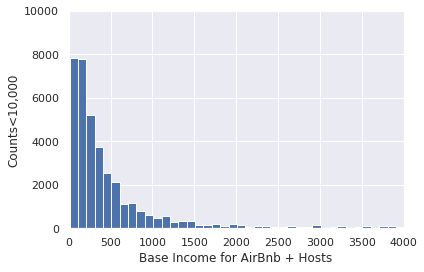

In [ ]:
data['base_income'] = data.minimum_nights * data.price

print('The mean base income for hosts is $%d' % data.base_income.mean())
median = data.base_income.median()
print('The median base income for hosts is ${}'.format(median))
print('The max $ for base income for hosts is ${}'.format(data.base_income.max()))
print('The maximum reasonable base income is ${}'.format(data.price.max()*30))

data.base_income.hist(bins=10000)
plt.ticklabel_format(style='plain') # from https://stackoverflow.com/questions/28371674/prevent-scientific-notation-in-matplotlib-pyplot
plt.ylim(0,10000)
plt.xlim(0,4000)
plt.xlabel('Base Income for AirBnb + Hosts')
plt.ylabel('Counts<10,000')

An interesting feature which was created (base_income) was the minimum nights multiplied by the price, shows the expected amount spent per rental to be collected by Airbnb and hosts. Since there are no limits to what people can charge there are some jokers that set their minimum income over what is reasonable even by the highest price multiplied by the generally highest minimum nights which we say is a month or 30 days.

## Great_Listing feature

In [ ]:
data['reviews_per_month']=data['reviews_per_month'].fillna(0)

data['std_price']=(data['price']-data['price'].mean())/data['price'].std()+.672 # .672 is the minimum for this price so all are positive
print(data.std_price.max())
data['review_rate']=data['reviews_per_month']/30.0+.0001
data['wanted_yr_rate']=(1-data['availability_365']/365.0)

data['great_listing'] = data['std_price']*data['review_rate']*data['wanted_yr_rate']
#data.loc[data['']]


data[['price','reviews_per_month','availability_365','std_price','review_rate','wanted_yr_rate','great_listing']].head()

50.720926368384895


,price,reviews_per_month,availability_365,std_price,review_rate,wanted_yr_rate,great_listing
0,149,0.21,365,0.705734,0.007100,0.000000,0.000000
1,225,0.38,355,1.091599,0.012767,0.027397,0.000382
3,89,4.64,194,0.401104,0.154767,0.468493,0.029083
4,80,0.10,0,0.355410,0.003433,1.000000,0.001220
5,200,0.59,129,0.964670,0.019767,0.646575,0.012329


The great_listing feature combines three factors in deciding if a property is a great listing- a rate of reviews per month, the rate of availability per year, and a standardized price. This creates a float that could be useful in weeding out some of the properties that really have very little to offer as well as the properties that are overpriced and not in demand. This feature is the money-maker factor and shows who really has a great listing.

# Exceptional Work

[[ 1.17640943 -0.16156256]
 [ 1.28177896 -0.76742067]
 [ 1.86520967 -4.05932024]
 ...
 [-0.51878493  0.27683122]
 [-0.77311125  0.32691271]
 [-0.99632286  0.39694841]]


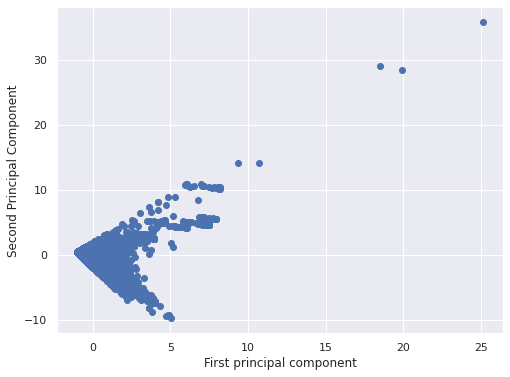

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pca_data= data[["minimum_nights","number_of_reviews", "calculated_host_listings_count","availability_365"]]
scaler.fit(pca_data)
scaled_data = scaler.transform(pca_data)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


print(x_pca)

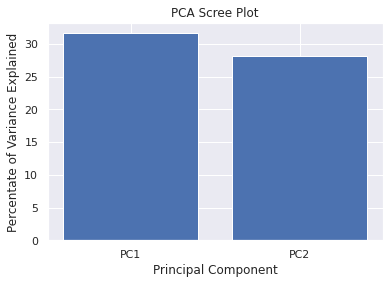

Percent variance for PC1 =  31.63 , PC2 =  28.11  for a cumulative of  59.739999999999995


In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x= range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
print('Percent variance for PC1 = ',percent_variance[0],', PC2 = ',percent_variance[1],' for a cumulative of ', percent_variance[0]+percent_variance[1])

For exceptional points we reduced dimensionality of the dataset to two principle components as well as created two new features from the continuous variables. First the four predictor variables were scaled so they each had a mean of 0 and a variance of 1. Then the four predictor variables were reduced into two principal components. As can be seen from the scree plot the first two principal components account for nearly 65% of the variability.